# 1. Supervised Learning - Regression (Part 1)

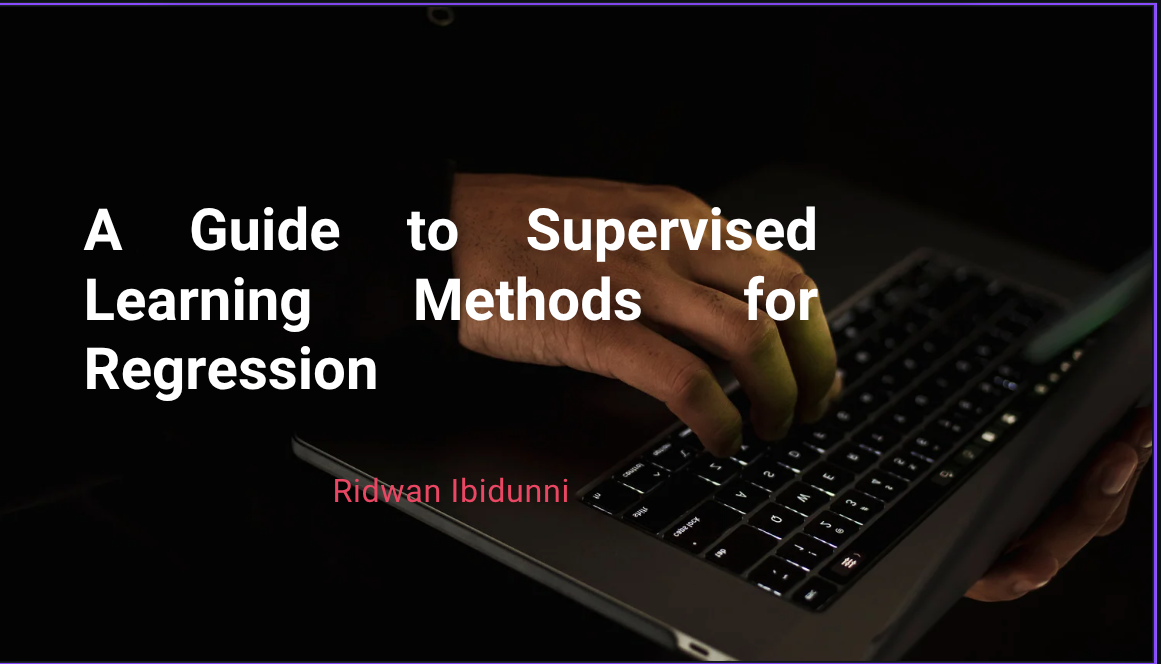

## Beyond Simple Linear Regression: The Multiple Feature Reality

**Definition Refresher:** In Lesson 1, we explored simple linear regression with single-feature relationships. But real-world problems rarely depend on just one variable.

**Today's Focus:** Multiple Linear Regression and Polynomial Regression - when one line isn't enough.

### The Regression Method Spectrum
Real-world regression problems require different approaches based on:
* **Number of features:** Single vs. Multiple variables
* **Relationship complexity:** Linear vs. Non-linear patterns  
* **Data characteristics:** Continuous vs. Mixed feature types



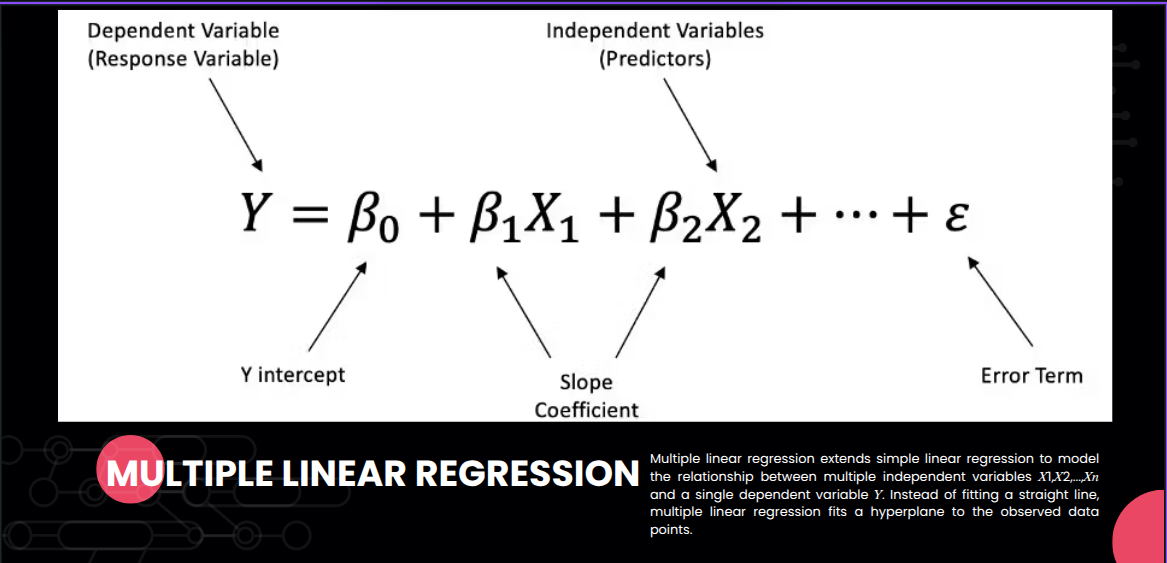

**Key Questions to Frame Any Regression Problem:**
- Does the relationship involve multiple independent variables?
- Are the relationships between features and target linear or curved?
- How do features interact with each other?
- What level of model complexity is appropriate for our data size?

#2. Problem Statement: Predicting Building Energy Efficiency

### **Scenario:**  A sustainable architecture firm aims to optimize energy consumption by predicting heating and cooling loads during the design phase.

### **The Challenge:** Building energy depends on complex interactions of multiple design factors, which traditional methods struggle to efficiently capture.

### **Your ML Task:** Build regression models to predict heating and cooling loads based on building parameters (e.g., surface area, window features, height, glazing).

### **Goal:** Enable design optimization, cost prediction, and achievement of sustainability targets.



**Why Multiple Linear Regression?**
Buildings have multiple design parameters that simultaneously influence energy consumption:
- Surface area and wall area (size factors)
- Window area and orientation (solar gain factors)  
- Building height and compactness (thermal factors)
- Glazing type and distribution (insulation factors)

**Why Polynomial Regression?**
Energy relationships are often non-linear:
- **Diminishing returns:** Doubling insulation doesn't halve energy loss
- **Interaction effects:** Window area impact varies dramatically with orientation
- **Threshold effects:** Energy consumption changes dramatically at certain building proportions

# Data Acquisition and Initial Inspection

In [ ]:
# Beyond simple regression: Multiple features reality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Energy Efficiency Dataset (UCI Repository - cleaned version)
# Dataset: Energy efficiency of buildings based on design parameters
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

energy_df = pd.read_excel(url)

energy_df.head()


[Check Dataset from its source](https://archive.ics.uci.edu/dataset/242/energy+efficiency)



In [ ]:
# Rename columns for clarity
energy_df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area',
                     'Roof_Area', 'Overall_Height', 'Orientation',
                     'Glazing_Area', 'Glazing_Area_Distribution',
                     'Heating_Load', 'Cooling_Load']

In [ ]:
energy_df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [ ]:
# Quick overview
print(f"Dataset shape: {energy_df.shape}")
print("\nBuilding Energy Efficiency Dataset:")
print("Predicting heating and cooling loads for sustainable building design")
print("\nFeature statistics:")
energy_df.describe().T

In [ ]:
# Check data types and missing values
print(f"\nData types:\n{energy_df.dtypes}")
print(f"\nMissing values: {energy_df.isnull().sum().sum()}")


Data types:
Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

Missing values: 0


In [ ]:
energy_df.head()

In [ ]:
print(f"\nData types:\n{energy_df.dtypes}")


Data types:
Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object


# 3. Explorative data analysis

In [ ]:
# 1. Correlation heatmap
correlation_matrix = energy_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')

In [ ]:
# 2. Distribution of target variables
plt.hist(energy_df['Heating_Load'], bins=30, alpha=0.7, label='Heating Load')
plt.hist(energy_df['Cooling_Load'], bins=30, alpha=0.7, label='Cooling Load')
plt.xlabel('Energy Load (kWh/m²)')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Loads')
plt.legend()

In [ ]:
# 3. Surface Area vs Heating Load (Linear relationship?)
plt.scatter(energy_df['Surface_Area'], energy_df['Heating_Load'], alpha=0.6)
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.title('Surface Area vs Heating Load')

In [ ]:
# 4. Glazing Area vs Cooling Load (Non-linear relationship?)
plt.scatter(energy_df['Glazing_Area'], energy_df['Cooling_Load'], alpha=0.6, color='orange')
plt.xlabel('Glazing Area')
plt.ylabel('Cooling Load')
plt.title('Glazing Area vs Cooling Load')

In [ ]:
# 5. Overall Height impact
energy_df.boxplot(column='Heating_Load', by='Overall_Height', ax=plt.gca())
plt.title('Heating Load by Building Height')
plt.suptitle('')  # Remove default title

In [ ]:
# 6. Orientation impact
energy_df.boxplot(column='Cooling_Load', by='Orientation', ax=plt.gca())
plt.title('Cooling Load by Orientation')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

In [ ]:
# Statistical summary of key insights
print("\n" + "="*50)
print("KEY INSIGHTS FROM EXPLORATORY ANALYSIS:")
print("="*50)
print(f"1. Strong correlation between Surface Area and both energy loads")
print(f"2. Glazing Area shows non-linear relationship with Cooling Load")
print(f"3. Building Height has categorical impact on energy consumption")
print(f"4. Orientation significantly affects cooling requirements")
print(f"5. Multiple features simultaneously influence energy efficiency")


KEY INSIGHTS FROM EXPLORATORY ANALYSIS:
1. Strong correlation between Surface Area and both energy loads
2. Glazing Area shows non-linear relationship with Cooling Load
3. Building Height has categorical impact on energy consumption
4. Orientation significantly affects cooling requirements
5. Multiple features simultaneously influence energy efficiency


# 3. Multiple Linear Regression: Handling Multiple Features

**The Mathematical Foundation:**
Unlike simple linear regression `(y = β₀ + β₁x)`, multiple linear regression extends to:

`**y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε**`

Where each βᵢ represents the change in y for a unit change in xᵢ, holding all other variables constant.

# Implementation: Multiple Linear Regression for Heating Load Prediction

In [ ]:
energy_df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [ ]:
# Prepare features and target
# Focus on heating load first (we'll do cooling load later)
features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Orientation',
           'Roof_Area', 'Overall_Height', 'Glazing_Area',
           'Glazing_Area_Distribution']

In [ ]:
X = energy_df[features]
y = energy_df['Heating_Load']

In [ ]:
X.shape

(768, 8)

In [ ]:
y.shape

(768,)

# Handle categorical variable: Orientation (one-hot encoding)

In [ ]:
X.dtypes

,0
Relative_Compactness,float64
Surface_Area,float64
Wall_Area,float64
Orientation,int64
Roof_Area,float64
Overall_Height,float64
Glazing_Area,float64
Glazing_Area_Distribution,int64


In [ ]:
print(f"Unique values in 'Orientation': ", X['Orientation'].unique())
print(f"Number of unique values: ", X['Orientation'].nunique())

Unique values in 'Orientation':  [2 3 4 5]
Number of unique values:  4


In [ ]:
print(f"Unique values in 'Glazing_Area_Distribution': ", X['Glazing_Area_Distribution'].unique())
print(f"Number of unique values: ", X['Glazing_Area_Distribution'].nunique())

Unique values in 'Glazing_Area_Distribution':  [0 1 2 3 4 5]
Number of unique values:  6


In [ ]:
categorical_features = ['Glazing_Area_Distribution', 'Orientation' ]
numeric_features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features )
    ],
    remainder='passthrough'
)

#  Building Machine Learning Model (Fit Multiple Linear Regression)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#build the model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

#fit the model
model_pipeline.fit(X_train, y_train)


# Make Predictions (Overfitting and Underfitting)

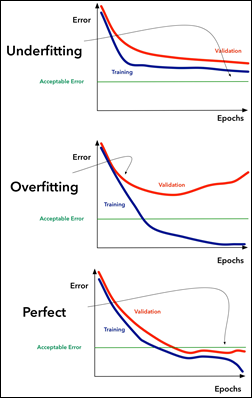

In [ ]:
#use the training dataset for diagonizing purposes (overfitting or underfitting)
y_pred_train = model_pipeline.predict(X_train)
#fit the model on unseen data
y_pred_test = model_pipeline.predict(X_test)

# Model Evaluation

In [ ]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("\n" + "="*50)
print("MULTIPLE LINEAR REGRESSION RESULTS:")
print("="*50)
print(f"Training MSE: {train_mse:.3f}")
print(f"Testing MSE: {test_mse:.3f}")
print(f"Training R²: {train_r2:.3f}")
print(f"Testing R²: {test_r2:.3f}")


MULTIPLE LINEAR REGRESSION RESULTS:
Training MSE: 7.654
Testing MSE: 8.250
Training R²: 0.924
Testing R²: 0.921


# Visualizing Multiple Linear Regression Results

In [ ]:
# Visualization: Actual vs Predicted values
plt.figure(figsize=(15, 5))

# Training set performance
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue') # this plots series of point based on y_train and y_pred_train
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2) # this plots line using the lowest and highest y_train
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title(f'Training Set\nR² = {train_r2:.3f}')
plt.grid(True, alpha=0.3)

In [ ]:
# Test set performance
plt.scatter(y_test, y_pred_test, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title(f'Test Set\nR² = {test_r2:.3f}')
plt.grid(True, alpha=0.3)

# 4. Polynomial Regression: Capturing Non-linear Relationships

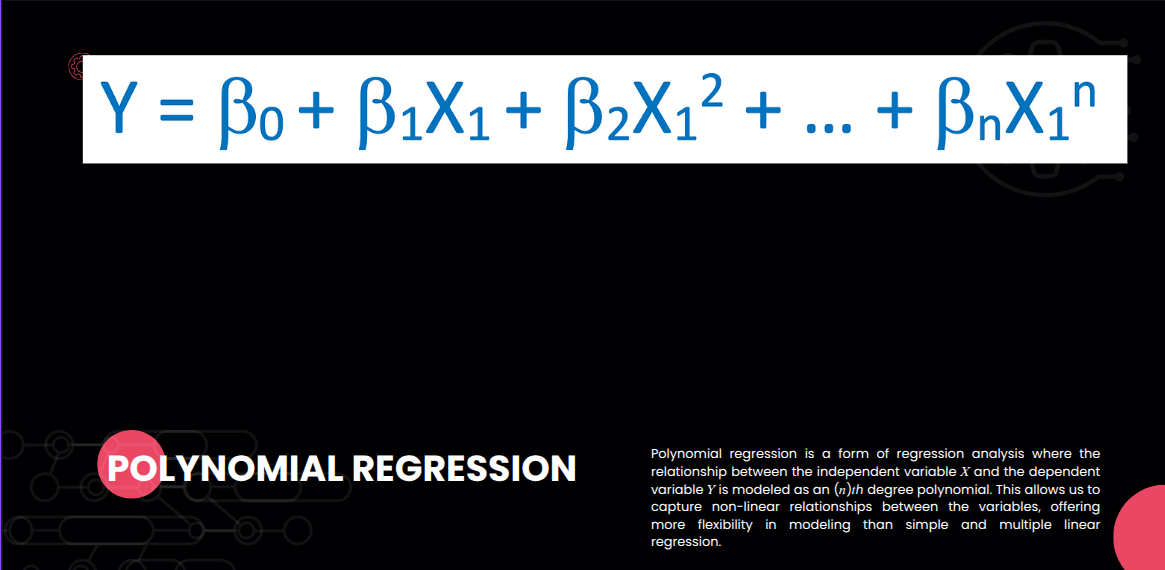

**When Linear Isn't Enough:**
Sometimes the relationship between features and target follows curves rather than straight lines. Polynomial regression captures these patterns by creating polynomial features.



**Mathematical Extension:**
For a single feature: `**y = β₀ + β₁x + β₂x² + β₃x³ + ... + βₙxⁿ**`
For multiple features: Include interaction terms like `x₁x₂, x₁²,` etc.

In [ ]:
# Implementation: Polynomial Regression for Cooling Load

# Focus on cooling load (often has more non-linear relationships)
y = energy_df['Cooling_Load']

# Select key features that showed non-linear patterns
key_features = ['Relative_Compactness', 'Glazing_Area', 'Glazing_Area_Distribution', 'Wall_Area', 'Orientation']

X = energy_df[key_features]

In [ ]:
X.columns

Index(['Relative_Compactness', 'Glazing_Area', 'Glazing_Area_Distribution',
       'Wall_Area', 'Orientation'],
      dtype='object')

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare different polynomial degrees

In [ ]:
# Compare different polynomial degrees
degrees = [1, 2, 3, 4]
poly_results = {}

plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly_transformed = poly_features.fit_transform(X_train)
    X_test_poly_transformed = poly_features.transform(X_test)

    # Fit model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly_transformed, y_train)

    # Predictions
    y_pred_train_poly = poly_model.predict(X_train_poly_transformed)
    y_pred_test_poly = poly_model.predict(X_test_poly_transformed)

    # Metrics
    train_mse_poly = mean_squared_error(y_train, y_pred_train_poly)
    test_mse_poly = mean_squared_error(y_test, y_pred_test_poly)
    train_r2_poly = r2_score(y_train, y_pred_train_poly)
    test_r2_poly = r2_score(y_test, y_pred_test_poly)

    # Store results
    poly_results[degree] = {
        'train_mse': train_mse_poly,
        'test_mse': test_mse_poly,
        'train_r2': train_r2_poly,
        'test_r2': test_r2_poly,
        'num_features': X_train_poly_transformed.shape[1]
    }

    # Visualize results
    plt.subplot(2, 2, i+1)
    plt.scatter(y_test, y_pred_test_poly, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Cooling Load')
    plt.ylabel('Predicted Cooling Load')
    plt.title(f'Degree {degree} Polynomial\nR² = {test_r2_poly:.3f}, Features = {X_train_poly_transformed.shape[1]}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [ ]:
X_test_poly_transformed.shape

(154, 125)

In [ ]:
X_train_poly_transformed.shape

(614, 125)

# Understanding Overfitting in Polynomial Regression

In [ ]:
# Demonstrate overfitting with increasing polynomial degrees
degrees_extended = range(1, 8)
train_scores = []
test_scores = []
feature_counts = []

for degree in degrees_extended:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_transformed = poly_features.fit_transform(X_train)
    X_test_transformed = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_transformed, y_train)

    train_score = model.score(X_train_transformed, y_train)
    test_score = model.score(X_test_transformed, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)
    feature_counts.append(X_train_transformed.shape[1])

# Visualize bias-variance tradeoff
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(degrees_extended, train_scores, 'o-', color='blue', label='Training R²')
plt.plot(degrees_extended, test_scores, 'o-', color='red', label='Testing R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Bias-Variance Tradeoff in Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(degrees_extended, feature_counts, 'o-', color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('Number of Features')
plt.title('Feature Explosion with Polynomial Degree')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "="*50)
print("OVERFITTING ANALYSIS:")
print("="*50)
optimal_degree = degrees_extended[np.argmax(test_scores)]
print(f"Optimal polynomial degree: {optimal_degree}")
print(f"Best test R²: {max(test_scores):.3f}")
print(f"Number of features at optimal degree: {feature_counts[optimal_degree-1]}")


OVERFITTING ANALYSIS:
Optimal polynomial degree: 5
Best test R²: 0.974
Number of features at optimal degree: 251

Train-Test R² gap at degree 5: 0.007


# **Interactive Coding exercises**

*Follow the links below to practice all these concepts*


1.   [Hands_on_Practice](https://colab.research.google.com/drive/1PjciYdjzrb3g_M4Zrz1MKrC_8E34DB0W?usp=sharing)




# **Practice Homework**

*Follow the link below for practice questions*

[African institute for Artificiall Intellgence - AI masterclass](https://github.com/aljebraschool/African-Institute-For-Artificial-Intelligence---AI-Masterclass)

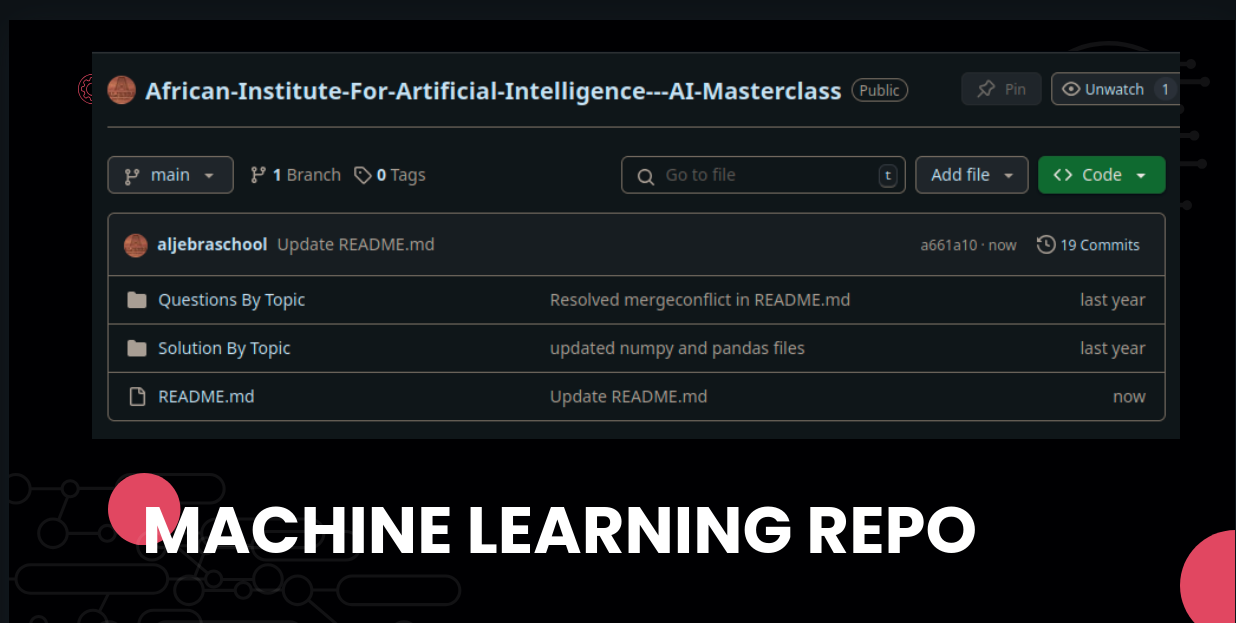

**Other social media links**



*   [Read more on the topic via my blog](https://aljebraschool.hashnode.dev)
*   [Follow me on Linkedin](https://linkedin.com/in/aljebraschool)

